<a href="https://colab.research.google.com/github/vladimbo/Bayesian/blob/master/MarkowitzEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install quandl

In [ ]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import preprocessing
import scipy as scipy
from pandas.plotting import register_matplotlib_converters
import datetime as DT
register_matplotlib_converters()
quandl.ApiConfig.api_key = "tKx_xUfgtNyNkyLM9M2R"
today = DT.date.today()
dtindex = pd.date_range(start='2010-01-01', end=today, freq='W')
DBT = pd.DataFrame(index=dtindex)
cutoff = today - DT.timedelta(days=120)
cutss = today - DT.timedelta(days=10)

       EXCSRESNWR1  EXCSRESNWR1M  EXCSRESNWR6M  EXCSRESNWRY
count  1112.000000   1109.000000   1087.000000  1061.000000
mean      0.001180      0.004731      0.034147     0.070523
std       0.023173      0.046228      0.176501     0.262885
min      -0.109642     -0.109642     -0.177239    -0.207068
25%       0.000000     -0.021025     -0.052815    -0.073592
50%       0.000000      0.000527     -0.007541    -0.011777
75%       0.000000      0.026651      0.062289     0.095055
max       0.389500      0.389500      1.172658     1.321993
            EXCSRESNW  EXCSRESNWR1S  EXCSRESNWR1MS  EXCSRESNWR6MS  EXCSRESNWRYS
2020-08-16  2751124.0     -0.050902       0.949748      -1.011114      2.770932
2020-08-19  2821740.0      1.056747       0.452907      -0.886674      3.097215
2020-08-23  2821740.0     -0.050902       0.452907      -0.886674      3.097215
2020-08-26  2821740.0     -0.050902       0.452907      -0.944285      3.097215
2020-08-30  2821740.0     -0.050902       0.452907      -0.9

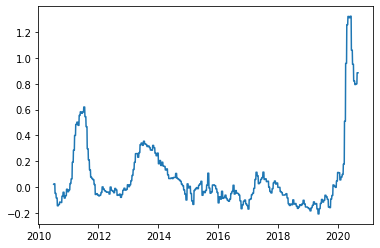

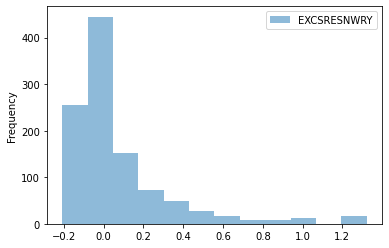

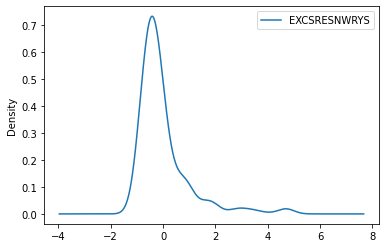

In [ ]:
ticker_data = (quandl.get('FRED/EXCSRESNW', start_date='2010-01-01', end_date=today))
EXCSRESNW = pd.concat([DBT, ticker_data['Value']], axis=1)
EXCSRESNW.fillna(method='ffill', inplace=True)
EXCSRESNW.fillna(method='bfill', inplace=True)
EXCSRESNW.columns = ['EXCSRESNW']
EXCSRESNWR1 = EXCSRESNW.pct_change(1)
EXCSRESNWR1.columns = ['EXCSRESNWR1']
EXCSRESNWR1S = (EXCSRESNWR1 - EXCSRESNWR1.mean())/EXCSRESNWR1.std()
EXCSRESNWR1S.columns = ['EXCSRESNWR1S']
EXCSRESNWR1M = EXCSRESNW.pct_change(4)
EXCSRESNWR1M.columns = ['EXCSRESNWR1M']
EXCSRESNWR1MS = (EXCSRESNWR1M - EXCSRESNWR1M.mean())/EXCSRESNWR1M.std()
EXCSRESNWR1MS.columns = ['EXCSRESNWR1MS']
EXCSRESNWR6M = EXCSRESNW.pct_change(26)
EXCSRESNWR6M.columns = ['EXCSRESNWR6M']
EXCSRESNWR6MS = (EXCSRESNWR6M - EXCSRESNWR6M.mean())/EXCSRESNWR6M.std()
EXCSRESNWR6MS.fillna(method='bfill', inplace=True)
#print(ZARR3MS.isna())
EXCSRESNWR6MS.columns = ['EXCSRESNWR6MS']
EXCSRESNWRY = EXCSRESNW.pct_change(52)
EXCSRESNWRY.columns = ['EXCSRESNWRY']
EXCSRESNWRYS = (EXCSRESNWRY - EXCSRESNWRY.mean())/EXCSRESNWRY.std()
EXCSRESNWRYS.columns = ['EXCSRESNWRYS']
EXCSRESNWTAB = EXCSRESNWR1.join(EXCSRESNWR1M).join(EXCSRESNWR6M).join(EXCSRESNWRY)
print(EXCSRESNWTAB.describe())
EXCSRESNWTABS = EXCSRESNW.join(EXCSRESNWR1S).join(EXCSRESNWR1MS).join(EXCSRESNWR6MS).join(EXCSRESNWRYS)
print(EXCSRESNWTABS.tail())
EXCSRESNWTABSCOV = EXCSRESNWTABS.cov()
print(EXCSRESNWTABSCOV)
plt.plot(EXCSRESNWRY)
EXCSRESNWHIST = EXCSRESNWRY.plot.hist(bins=12, alpha=0.5)
EXCSRESNWNORM = EXCSRESNWRYS.plot.kde(bw_method=0.3)

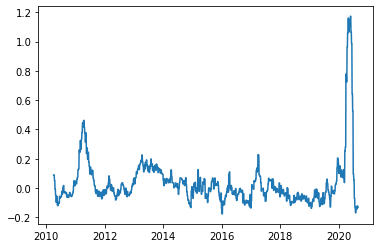

In [ ]:
plt.clf()
plt.plot(EXCSRESNWR6M)

               VIX        VIXR1       VIXR1W       VIXR3M        VIXRY
count  3239.000000  3238.000000  3234.000000  3179.000000  2979.000000
mean     18.362470     0.001687     0.006973     0.052265     0.065807
std       6.485047     0.058322     0.119603     0.390471     0.411868
min       9.875000    -0.291378    -0.363879    -0.599656    -0.637070
25%      14.350000    -0.025382    -0.064430    -0.155522    -0.193848
50%      16.500000     0.000000    -0.010591    -0.033223    -0.021635
75%      20.100000     0.015147     0.060536     0.133106     0.207633
max      72.625000     1.126400     1.377460     3.833611     3.370543
               VIX    VIXR1S   VIXR1WS   VIXR3MS    VIXRYS
2020-08-30  26.950 -0.028924  0.305924 -0.738255  1.383952
2020-08-31  27.875  0.559586  0.729390 -0.671099  1.596463
2020-09-01  28.325  0.247877  0.663166 -0.401086  1.703809
2020-09-02  28.875  0.304014  0.514052 -0.378520  1.957313
2020-09-03  33.875  2.940135  2.090124 -0.110967  2.744336
       

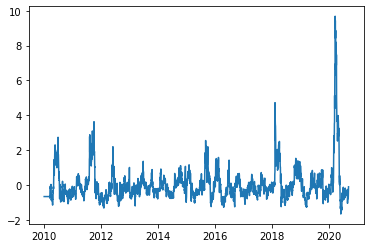

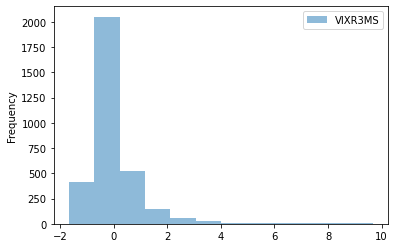

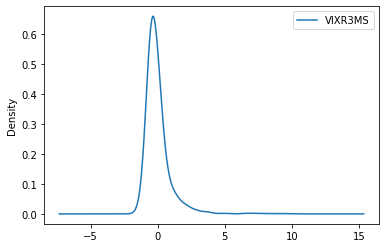

In [ ]:
ticker_data = (quandl.get('CHRIS/CBOE_VX1', start_date='2010-01-01', end_date=today))
VIX = pd.concat([DBT, ticker_data['Settle']], axis=1)
VIX.fillna(method='ffill', inplace=True)
VIX.fillna(method='bfill', inplace=True)
VIX.columns = ['VIX']
VIXR1 = VIX.pct_change(1)
VIXR1.columns = ['VIXR1']
VIXR1S = (VIXR1 - VIXR1.mean())/VIXR1.std()
VIXR1S.columns = ['VIXR1S']
VIXR1W = VIX.pct_change(5)
VIXR1W.columns = ['VIXR1W']
VIXR1WS = (VIXR1W - VIXR1W.mean())/VIXR1W.std()
VIXR1WS.columns = ['VIXR1WS']
VIXR3M = VIX.pct_change(60)
VIXR3M.columns = ['VIXR3M']
VIXR3MS = (VIXR3M - VIXR3M.mean())/VIXR3M.std()
VIXR3MS.fillna(method='bfill', inplace=True)
#print(VIXR3MS.isna())
VIXR3MS.columns = ['VIXR3MS']
VIXRY = VIX.pct_change(260)
VIXRY.columns = ['VIXRY']
VIXRYS = (VIXRY - VIXRY.mean())/VIXRY.std()
VIXRYS.columns = ['VIXRYS']
VIXTAB = VIX.join(VIXR1).join(VIXR1W).join(VIXR3M).join(VIXRY)
print(VIXTAB.describe())
VIXTABS = VIX.join(VIXR1S).join(VIXR1WS).join(VIXR3MS).join(VIXRYS)
print(VIXTABS.tail())
VIXTABSCOV = VIXTABS.cov()
print(VIXTABSCOV)
plt.plot(VIXR3MS)
VIXHIST = VIXR3MS.plot.hist(bins=12, alpha=0.5)
VIXNORM = VIXR3MS.plot.kde(bw_method=0.3)



                CL         CLR1        CLR1W        CLR3M         CLRY
count  3248.000000  3247.000000  3243.000000  3188.000000  2988.000000
mean     70.311090    -0.001074    -0.000983     0.007205    -0.017996
std      23.019121     0.063048     0.076885     0.212038     0.263357
min     -37.630000    -3.059661    -2.871208    -2.043582    -1.735823
25%      50.440000    -0.008462    -0.023981    -0.089128    -0.167324
50%      67.390000     0.000000     0.000587     0.014689     0.003065
75%      92.832500     0.008698     0.023522     0.099674     0.124190
max     113.930000     0.376623     0.652350     2.978022     0.980160
               CL     CLR1S    CLR1WS    CLR3MS     CLRYS
2020-08-31  42.61 -0.115851 -0.209235  0.305347 -0.838040
2020-09-01  42.76  0.072866 -0.176057  0.234117 -0.841277
2020-09-02  41.51 -0.446628 -0.449567  0.099201 -0.946961
2020-09-03  41.37 -0.036463 -0.471508  0.382919 -0.956343
2020-09-04  39.77 -0.596393 -0.955807  0.093914 -1.022976
             

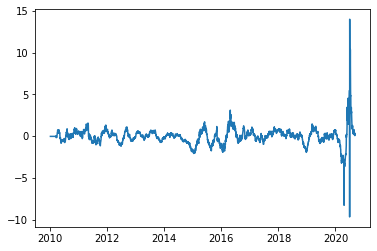

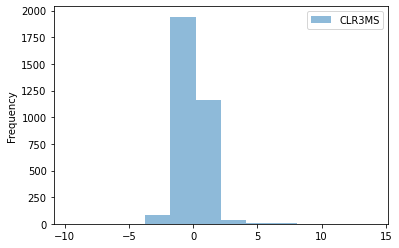

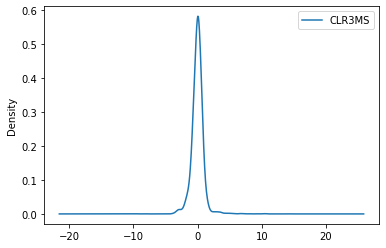

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_CL1', start_date='2010-01-01', end_date=today))
CL = pd.concat([DBT, ticker_data['Settle']], axis=1)
CL.fillna(method='ffill', inplace=True)
CL.fillna(method='bfill', inplace=True)
CL.columns = ['CL']
CLR1 = CL.pct_change(1)
CLR1.columns = ['CLR1']
CLR1S = (CLR1 - CLR1.mean())/CLR1.std()
CLR1S.columns = ['CLR1S']
CLR1W = CL.pct_change(5)
CLR1W.columns = ['CLR1W']
CLR1WS = (CLR1W - CLR1W.mean())/CLR1W.std()
CLR1WS.columns = ['CLR1WS']
CLR3M = CL.pct_change(60)
CLR3M.columns = ['CLR3M']
CLR3MS = (CLR3M - CLR3M.mean())/CLR3M.std()
CLR3MS.fillna(method='bfill', inplace=True)
#print(CLR3MS.isna())
CLR3MS.columns = ['CLR3MS']
CLRY = CL.pct_change(260)
CLRY.columns = ['CLRY']
CLRYS = (CLRY - CLRY.mean())/CLRY.std()
CLRYS.columns = ['CLRYS']
CLTAB = CL.join(CLR1).join(CLR1W).join(CLR3M).join(CLRY)
print(CLTAB.describe())
CLTABS = CL.join(CLR1S).join(CLR1WS).join(CLR3MS).join(CLRYS)
print(CLTABS.tail())
CLTABSCOV = CLTABS.cov()
print(CLTABSCOV)
plt.plot(CLR3MS)
CLHIST = CLR3MS.plot.hist(bins=12, alpha=0.5)
CLNORM = CLR3MS.plot.kde(bw_method=0.3)

               US1        US1R1       US1R1W       US1R3M        US1RY
count  3249.000000  3248.000000  3244.000000  3189.000000  2989.000000
mean    146.512840     0.000151     0.000754     0.008979     0.032228
std      14.807997     0.006028     0.012999     0.044866     0.088194
min     114.375000    -0.040274    -0.060853    -0.116433    -0.143236
25%     137.062500    -0.002576    -0.006794    -0.016101    -0.047550
50%     146.031250     0.000000     0.001096     0.007993     0.039702
75%     155.187500     0.003136     0.008562     0.034273     0.095019
max     186.937500     0.103891     0.118474     0.194727     0.266568
                  US1    US1R1S   US1R1WS   US1R3MS    US1RYS
2020-08-31  177.37500  0.856432 -0.556231 -0.417885  0.858522
2020-09-01  178.00000  0.559519 -0.125473 -0.109769  0.912638
2020-09-02  178.87500  0.790449  1.018597  0.043930  1.021893
2020-09-03  179.53125  0.583598  1.290914  0.007402  1.068582
2020-09-04  177.03125 -2.334944  0.200880 -0.348645

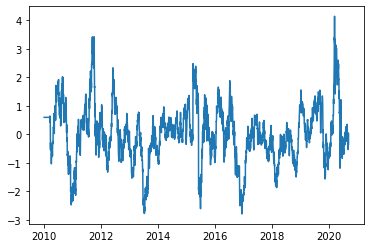

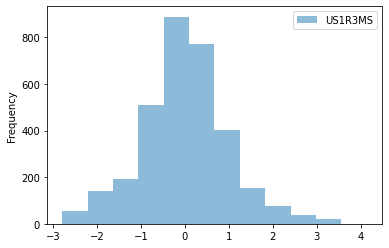

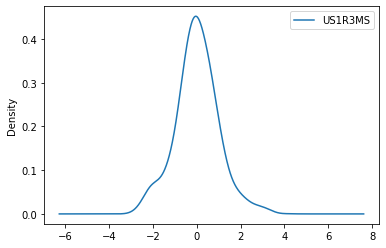

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_US1', start_date='2010-01-01', end_date=today))
US1 = pd.concat([DBT, ticker_data['Settle']], axis=1)
US1.fillna(method='ffill', inplace=True)
US1.fillna(method='bfill', inplace=True)
US1.columns = ['US1']
US1R1 = US1.pct_change(1)
US1R1.columns = ['US1R1']
US1R1S = (US1R1 - US1R1.mean())/US1R1.std()
US1R1S.columns = ['US1R1S']
US1R1W = US1.pct_change(5)
US1R1W.columns = ['US1R1W']
US1R1WS = (US1R1W - US1R1W.mean())/US1R1W.std()
US1R1WS.columns = ['US1R1WS']
US1R3M = US1.pct_change(60)
US1R3M.columns = ['US1R3M']
US1R3MS = (US1R3M - US1R3M.mean())/US1R3M.std()
US1R3MS.fillna(method='bfill', inplace=True)
#print(US1R3MS.isna())
US1R3MS.columns = ['US1R3MS']
US1RY = US1.pct_change(260)
US1RY.columns = ['US1RY']
US1RYS = (US1RY - US1RY.mean())/US1RY.std()
US1RYS.columns = ['US1RYS']
US1TAB = US1.join(US1R1).join(US1R1W).join(US1R3M).join(US1RY)
print(US1TAB.describe())
US1TABS = US1.join(US1R1S).join(US1R1WS).join(US1R3MS).join(US1RYS)
print(US1TABS.tail())
US1TABSCOV = US1TABS.cov()
print(US1TABSCOV)
plt.plot(US1R3MS)
US1HIST = US1R3MS.plot.hist(bins=12, alpha=0.5)
US1NORM = US1R3MS.plot.kde(bw_method=0.3)


               AUD        AUDR1       AUDR1W       AUDR3M        AUDRY
count  3249.000000  3248.000000  3244.000000  3189.000000  2989.000000
mean      0.842828    -0.000047    -0.000226    -0.003295    -0.021437
std       0.129757     0.006252     0.014453     0.046678     0.084348
min       0.578000    -0.040802    -0.085877    -0.167866    -0.215132
25%       0.731700    -0.002805    -0.008422    -0.031725    -0.074446
50%       0.790500     0.000000     0.000000    -0.006126    -0.020757
75%       0.961100     0.002932     0.008408     0.024087     0.032269
max       1.093700     0.032452     0.069233     0.196996     0.290829
               AUD    AUDR1S   AUDR1WS   AUDR3MS    AUDRYS
2020-08-31  0.7389  0.703226  1.871268  1.756307  1.162794
2020-09-01  0.7368 -0.447155  1.365487  1.464127  1.182399
2020-09-02  0.7317 -1.099755  0.558833  1.244131  1.101348
2020-09-03  0.7275 -0.910719 -0.755530  1.340142  1.028433
2020-09-04  0.7298  0.513179 -0.539230  1.392016  1.033210
       

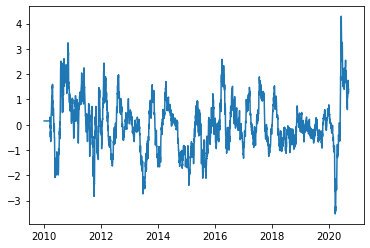

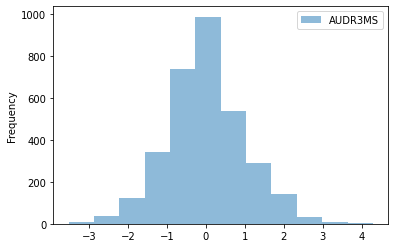

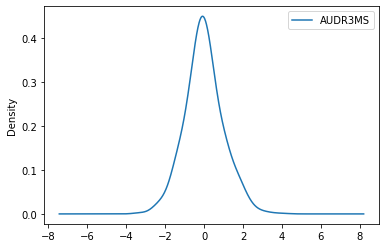

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_AD1', start_date='2010-01-01', end_date=today))
AUD = pd.concat([DBT, ticker_data['Settle']], axis=1)
AUD.fillna(method='ffill', inplace=True)
AUD.fillna(method='bfill', inplace=True)
AUD.columns = ['AUD']
AUDR1 = AUD.pct_change(1)
AUDR1.columns = ['AUDR1']
AUDR1S = (AUDR1 - AUDR1.mean())/AUDR1.std()
AUDR1S.columns = ['AUDR1S']
AUDR1W = AUD.pct_change(5)
AUDR1W.columns = ['AUDR1W']
AUDR1WS = (AUDR1W - AUDR1W.mean())/AUDR1W.std()
AUDR1WS.columns = ['AUDR1WS']
AUDR3M = AUD.pct_change(60)
AUDR3M.columns = ['AUDR3M']
AUDR3MS = (AUDR3M - AUDR3M.mean())/AUDR3M.std()
AUDR3MS.fillna(method='bfill', inplace=True)
#print(AUDR3MS.isna())
AUDR3MS.columns = ['AUDR3MS']
AUDRY = AUD.pct_change(260)
AUDRY.columns = ['AUDRY']
AUDRYS = (AUDRY - AUDRY.mean())/AUDRY.std()
AUDRYS.columns = ['AUDRYS']
AUDTAB = AUD.join(AUDR1).join(AUDR1W).join(AUDR3M).join(AUDRY)
print(AUDTAB.describe())
AUDTABS = AUD.join(AUDR1S).join(AUDR1WS).join(AUDR3MS).join(AUDRYS)
print(AUDTABS.tail())
AUDTABSCOV = AUDTABS.cov()
print(AUDTABSCOV)
plt.plot(AUDR3MS)
AUDHIST = AUDR3MS.plot.hist(bins=12, alpha=0.5)
AUDNORM = AUDR3MS.plot.kde(bw_method=0.3)



               CAD        CADR1       CADR1W       CADR3M        CADRY
count  2239.000000  2238.000000  2234.000000  2179.000000  1979.000000
mean      1.260381     0.000099     0.000496     0.006803     0.032069
std       0.100981     0.004229     0.009413     0.034978     0.060859
min       1.063603    -0.019122    -0.036716    -0.108129    -0.095362
25%       1.221449    -0.001620    -0.005169    -0.011743    -0.007135
50%       1.301829     0.000000     0.000000     0.003028     0.024704
75%       1.328198     0.001885     0.005822     0.026485     0.058092
max       1.456664     0.026921     0.049062     0.127294     0.191131
                 CAD    CADR1S   CADR1WS   CADR3MS    CADRYS
2020-08-31  1.304717 -0.918047 -1.057605 -1.358296 -0.551592
2020-09-01  1.306506  0.300993 -0.691164 -1.156322 -0.529084
2020-09-02  1.304461 -0.393516 -0.717881 -1.257375 -0.541941
2020-09-03  1.312767  1.482101  0.198352 -1.258512 -0.437419
2020-09-04  1.306336 -1.181712 -0.323309 -1.395220 -0.51

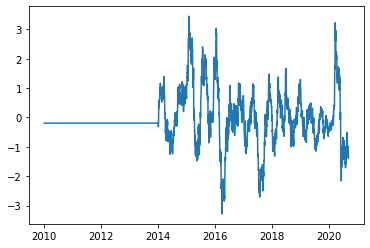

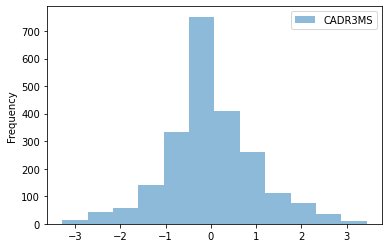

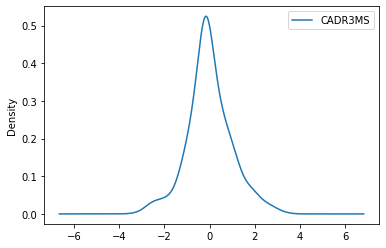

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_CD1', start_date='2014-01-01', end_date=today))
CAD = pd.concat([DBT, 1/ticker_data['Last']], axis=1)
CAD.fillna(method='ffill', inplace=True)
CAD.fillna(method='bfill', inplace=True)
CAD.columns = ['CAD']
CADR1 = CAD.pct_change(1)
CADR1.columns = ['CADR1']
CADR1S = (CADR1 - CADR1.mean())/CADR1.std()
CADR1S.columns = ['CADR1S']
CADR1W = CAD.pct_change(5)
CADR1W.columns = ['CADR1W']
CADR1WS = (CADR1W - CADR1W.mean())/CADR1W.std()
CADR1WS.columns = ['CADR1WS']
CADR3M = CAD.pct_change(60)
CADR3M.columns = ['CADR3M']
CADR3MS = (CADR3M - CADR3M.mean())/CADR3M.std()
CADR3MS.fillna(method='bfill', inplace=True)
#print(CADR3MS.isna())
CADR3MS.columns = ['CADR3MS']
CADRY = CAD.pct_change(260)
CADRY.columns = ['CADRY']
CADRYS = (CADRY - CADRY.mean())/CADRY.std()
CADRYS.columns = ['CADRYS']
CADTAB = CAD.join(CADR1).join(CADR1W).join(CADR3M).join(CADRY)
print(CADTAB.describe())
CADTABS = CAD.join(CADR1S).join(CADR1WS).join(CADR3MS).join(CADRYS)
print(CADTABS.tail())
CADTABSCOV = CADTABS.cov()
print(CADTABSCOV)
plt.plot(CADR3MS)
CADHIST = CADR3MS.plot.hist(bins=12, alpha=0.5)
CADNORM = CADR3MS.plot.kde(bw_method=0.3)



                CL         CLR1        CLR1W        CLR3M         CLRY
count  3057.000000  3056.000000  3052.000000  2997.000000  2797.000000
mean     73.365427    -0.000003    -0.000099     0.000006    -0.011236
std      20.687397     0.015706     0.033255     0.114571     0.203979
min      33.510000    -0.092308    -0.139545    -0.373715    -0.480700
25%      54.200000    -0.005980    -0.018524    -0.070257    -0.106939
50%      69.160000     0.000000     0.001304     0.012309    -0.006498
75%      93.880000     0.007100     0.018996     0.079642     0.091187
max     114.730000     0.096716     0.214386     0.313564     0.555059
               CL     CLR1S    CLR1WS    CLR3MS     CLRYS
2020-01-14  57.10  0.359038 -0.427882  0.377907 -0.027636
2020-01-15  56.67 -0.479255 -0.574723  0.309332 -0.063932
2020-01-16  57.09  0.472084 -0.232211  0.328324 -0.080191
2020-01-17  57.28  0.212108 -0.132915  0.258826 -0.070834
2020-01-19  57.28  0.000213  0.267765  0.438436 -0.156999
             

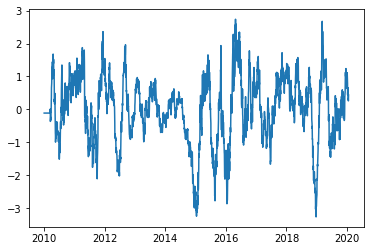

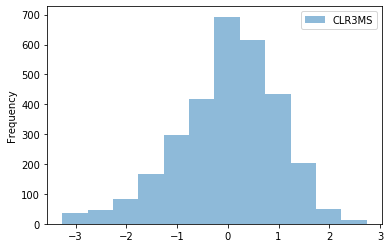

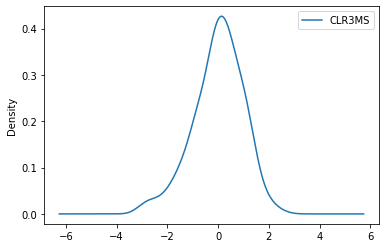

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_CL7', start_date='2010-01-01', end_date=today))
CL = pd.concat([DBT, ticker_data['Last']], axis=1)
CL.fillna(method='ffill', inplace=True)
CL.fillna(method='bfill', inplace=True)
CL.columns = ['CL']
CLR1 = CL.pct_change(1)
CLR1.columns = ['CLR1']
CLR1S = (CLR1 - CLR1.mean())/CLR1.std()
CLR1S.columns = ['CLR1S']
CLR1W = CL.pct_change(5)
CLR1W.columns = ['CLR1W']
CLR1WS = (CLR1W - CLR1W.mean())/CLR1W.std()
CLR1WS.columns = ['CLR1WS']
CLR3M = CL.pct_change(60)
CLR3M.columns = ['CLR3M']
CLR3MS = (CLR3M - CLR3M.mean())/CLR3M.std()
CLR3MS.fillna(method='bfill', inplace=True)
#print(CLR3MS.isna())
CLR3MS.columns = ['CLR3MS']
CLRY = CL.pct_change(260)
CLRY.columns = ['CLRY']
CLRYS = (CLRY - CLRY.mean())/CLRY.std()
CLRYS.columns = ['CLRYS']
CLTAB = CL.join(CLR1).join(CLR1W).join(CLR3M).join(CLRY)
print(CLTAB.describe())
CLTABS = CL.join(CLR1S).join(CLR1WS).join(CLR3MS).join(CLRYS)
print(CLTABS.tail())
CLTABSCOV = CLTABS.cov()
print(CLTABSCOV)
plt.plot(CLR3MS)
CLHIST = CLR3MS.plot.hist(bins=12, alpha=0.5)
CLNORM = CLR3MS.plot.kde(bw_method=0.3)



               CNH        CNHR1       CNHR1W       CNHR3M        CNHRY
count  2191.000000  2190.000000  2186.000000  2131.000000  1931.000000
mean      6.584594     0.000053     0.000268     0.003882     0.019060
std       0.327888     0.002472     0.005327     0.021293     0.037481
min       6.103200    -0.012768    -0.024309    -0.052581    -0.090975
25%       6.235250    -0.000747    -0.002348    -0.009547     0.003793
50%       6.618000     0.000000     0.000000     0.000000     0.025728
75%       6.883700     0.000804     0.002845     0.016806     0.045132
max       7.186300     0.033167     0.043752     0.087088     0.098720
               CNH    CNHR1S   CNHR1WS   CNHR3MS    CNHRYS
2020-08-31  6.8540 -0.722861 -1.620151 -1.730788 -1.304235
2020-09-01  6.8416 -0.753594 -1.309478 -1.693030 -1.389772
2020-09-02  6.8381 -0.228588 -1.572469 -1.701496 -1.329875
2020-09-03  6.8514  0.765341 -0.446795 -1.749296 -1.279581
2020-09-04  6.8392 -0.742061 -0.780351 -1.822458 -1.365610
       

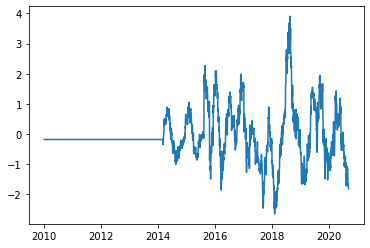

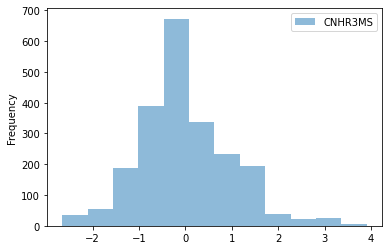

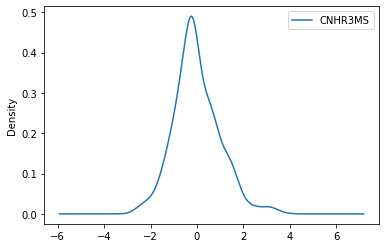

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_CNH1', start_date='2014-01-01', end_date=today))
CNH = pd.concat([DBT, ticker_data['Last']], axis=1)
CNH.fillna(method='ffill', inplace=True)
CNH.fillna(method='bfill', inplace=True)
CNH.columns = ['CNH']
CNHR1 = CNH.pct_change(1)
CNHR1.columns = ['CNHR1']
CNHR1S = (CNHR1 - CNHR1.mean())/CNHR1.std()
CNHR1S.columns = ['CNHR1S']
CNHR1W = CNH.pct_change(5)
CNHR1W.columns = ['CNHR1W']
CNHR1WS = (CNHR1W - CNHR1W.mean())/CNHR1W.std()
CNHR1WS.columns = ['CNHR1WS']
CNHR3M = CNH.pct_change(60)
CNHR3M.columns = ['CNHR3M']
CNHR3MS = (CNHR3M - CNHR3M.mean())/CNHR3M.std()
CNHR3MS.fillna(method='bfill', inplace=True)
#print(CNHR3MS.isna())
CNHR3MS.columns = ['CNHR3MS']
CNHRY = CNH.pct_change(260)
CNHRY.columns = ['CNHRY']
CNHRYS = (CNHRY - CNHRY.mean())/CNHRY.std()
CNHRYS.columns = ['CNHRYS']
CNHTAB = CNH.join(CNHR1).join(CNHR1W).join(CNHR3M).join(CNHRY)
print(CNHTAB.describe())
CNHTABS = CNH.join(CNHR1S).join(CNHR1WS).join(CNHR3MS).join(CNHRYS)
print(CNHTABS.tail())
CNHTABSCOV = CNHTABS.cov()
print(CNHTABSCOV)
plt.plot(CNHR3MS)
CNHHIST = CNHR3MS.plot.hist(bins=12, alpha=0.5)
CNHNORM = CNHR3MS.plot.kde(bw_method=0.3)



               ES1        ES1R1       ES1R1W       ES1R3M        ES1RY
count  2240.000000  2239.000000  2235.000000  2180.000000  1980.000000
mean   2379.438728     0.000328     0.001645     0.018123     0.073670
std     448.412913     0.009828     0.019467     0.060054     0.073830
min    1732.750000    -0.106257    -0.173429    -0.320591    -0.223244
25%    1999.687500    -0.001448    -0.004317    -0.000828     0.024902
50%    2261.250000     0.000000     0.001624     0.020852     0.081593
75%    2770.750000     0.003532     0.010426     0.049231     0.131663
max    3577.250000     0.101590     0.136543     0.406134     0.307717
                ES1    ES1R1S   ES1R1WS   ES1R3MS    ES1RYS
2020-08-31  3493.75 -0.410596  0.649977  1.235324  1.199900
2020-09-01  3529.50  1.007789  0.646175  1.944335  1.378197
2020-09-02  3577.25  1.343190  1.233698  2.183080  1.502744
2020-09-03  3462.50 -3.297346 -0.732730  1.950304  0.988053
2020-09-04  3415.00 -1.429258 -1.428552  1.548416  0.687998
 

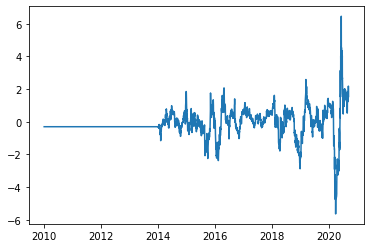

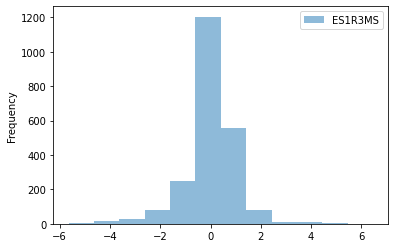

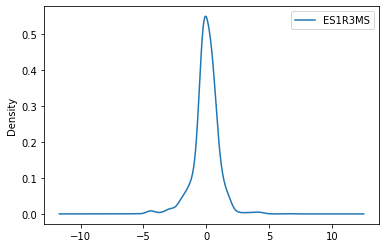

In [ ]:
ticker_data = (quandl.get('CHRIS/CME_ES1', start_date='2014-01-01', end_date=today))
ES1 = pd.concat([DBT, ticker_data['Last']], axis=1)
ES1.fillna(method='ffill', inplace=True)
ES1.fillna(method='bfill', inplace=True)
ES1.columns = ['ES1']
ES1R1 = ES1.pct_change(1)
ES1R1.columns = ['ES1R1']
ES1R1S = (ES1R1 - ES1R1.mean())/ES1R1.std()
ES1R1S.columns = ['ES1R1S']
ES1R1W = ES1.pct_change(5)
ES1R1W.columns = ['ES1R1W']
ES1R1WS = (ES1R1W - ES1R1W.mean())/ES1R1W.std()
ES1R1WS.columns = ['ES1R1WS']
ES1R3M = ES1.pct_change(60)
ES1R3M.columns = ['ES1R3M']
ES1R3MS = (ES1R3M - ES1R3M.mean())/ES1R3M.std()
ES1R3MS.fillna(method='bfill', inplace=True)
#print(ES1R3MS.isna())
ES1R3MS.columns = ['ES1R3MS']
ES1RY = ES1.pct_change(260)
ES1RY.columns = ['ES1RY']
ES1RYS = (ES1RY - ES1RY.mean())/ES1RY.std()
ES1RYS.columns = ['ES1RYS']
ES1TAB = ES1.join(ES1R1).join(ES1R1W).join(ES1R3M).join(ES1RY)
print(ES1TAB.describe())
ES1TABS = ES1.join(ES1R1S).join(ES1R1WS).join(ES1R3MS).join(ES1RYS)
print(ES1TABS.tail())
ES1TABSCOV = ES1TABS.cov()
print(ES1TABSCOV)
plt.plot(ES1R3MS)
ES1HIST = ES1R3MS.plot.hist(bins=12, alpha=0.5)
ES1NORM = ES1R3MS.plot.kde(bw_method=0.3)



               BTP        BTPR1       BTPR1W       BTPR3M        BTPRY
count  2267.000000  2266.000000  2262.000000  2207.000000  2007.000000
mean    133.021275     0.000116     0.000581     0.006956     0.030104
std       8.784746     0.004648     0.010375     0.034455     0.074103
min     115.810000    -0.045335    -0.097916    -0.114234    -0.153270
25%     127.480000    -0.001242    -0.003718    -0.010064    -0.023031
50%     135.110000     0.000000     0.000503     0.009103     0.030748
75%     139.440000     0.001972     0.005957     0.031197     0.083931
max     148.430000     0.041408     0.069380     0.101983     0.214851
               BTP    BTPR1S   BTPR1WS   BTPR3MS    BTPRYS
2020-08-31  146.21 -0.860359 -0.404122  0.352395 -0.231411
2020-09-01  146.69  0.681338 -0.206892  0.397878 -0.186535
2020-09-02  147.60  1.309652  0.429639  0.581649 -0.040961
2020-09-03  147.48 -0.199830  0.403638  0.663479 -0.069554
2020-09-04  146.93 -0.827219  0.042487  0.502193 -0.104836
       

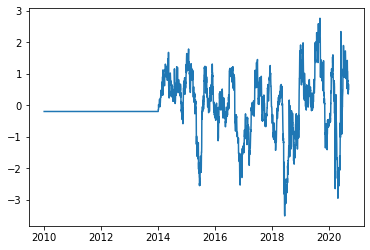

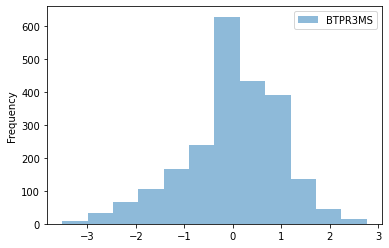

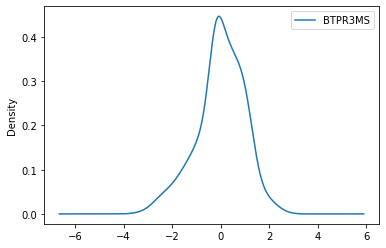

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FBTP1', start_date='2014-01-01', end_date=today))
BTP = pd.concat([DBT, ticker_data['Settle']], axis=1)
BTP.fillna(method='ffill', inplace=True)
BTP.fillna(method='bfill', inplace=True)
BTP.columns = ['BTP']
BTPR1 = BTP.pct_change(1)
BTPR1.columns = ['BTPR1']
BTPR1S = (BTPR1 - BTPR1.mean())/BTPR1.std()
BTPR1S.columns = ['BTPR1S']
BTPR1W = BTP.pct_change(5)
BTPR1W.columns = ['BTPR1W']
BTPR1WS = (BTPR1W - BTPR1W.mean())/BTPR1W.std()
BTPR1WS.columns = ['BTPR1WS']
BTPR3M = BTP.pct_change(60)
BTPR3M.columns = ['BTPR3M']
BTPR3MS = (BTPR3M - BTPR3M.mean())/BTPR3M.std()
BTPR3MS.fillna(method='bfill', inplace=True)
#print(BTPR3MS.isna())
BTPR3MS.columns = ['BTPR3MS']
BTPRY = BTP.pct_change(260)
BTPRY.columns = ['BTPRY']
BTPRYS = (BTPRY - BTPRY.mean())/BTPRY.std()
BTPRYS.columns = ['BTPRYS']
BTPTAB = BTP.join(BTPR1).join(BTPR1W).join(BTPR3M).join(BTPRY)
print(BTPTAB.describe())
BTPTABS = BTP.join(BTPR1S).join(BTPR1WS).join(BTPR3MS).join(BTPRYS)
print(BTPTABS.tail())
BTPTABSCOV = BTPTABS.cov()
print(BTPTABSCOV)
plt.plot(BTPR3MS)
BTPHIST = BTPR3MS.plot.hist(bins=12, alpha=0.5)
BTPNORM = BTPR3MS.plot.kde(bw_method=0.3)


             EMSTX      EMSTXR1     EMSTXR1W     EMSTXR3M      EMSTXRY
count  2266.000000  2265.000000  2261.000000  2206.000000  2006.000000
mean    436.650256     0.000177     0.000894     0.010230     0.034168
std      57.055252     0.011292     0.024146     0.081735     0.140511
min     293.200000    -0.127151    -0.173158    -0.344094    -0.310376
25%     400.600000    -0.003506    -0.011430    -0.041293    -0.069935
50%     430.900000     0.000000     0.000000     0.006163     0.035568
75%     485.175000     0.005071     0.013882     0.066974     0.127975
max     577.200000     0.086689     0.104389     0.317394     0.374588
            EMSTX  EMSTXR1S  EMSTXR1WS  EMSTXR3MS  EMSTXRYS
2020-08-31  526.9 -2.275941  -0.778109   1.121413  0.247747
2020-09-01  536.5  1.597893  -0.198516   1.093542  0.386359
2020-09-02  534.9 -0.279772  -0.013799   1.311205  0.301085
2020-09-03  526.3 -1.439514  -1.140009   1.099841  0.216028
2020-09-04  520.4 -1.008452  -1.591919   1.044216  0.150847
 

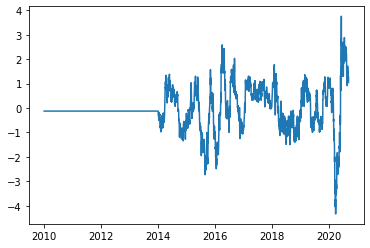

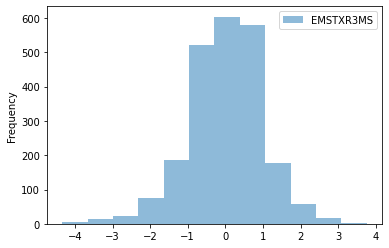

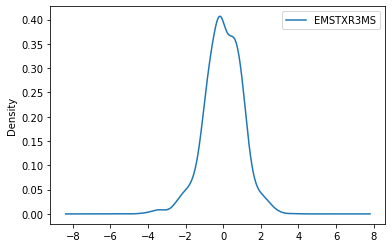

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FMEM1', start_date='2014-01-01', end_date=today))
EMSTX = pd.concat([DBT, ticker_data['Settle']], axis=1)
EMSTX.fillna(method='ffill', inplace=True)
EMSTX.fillna(method='bfill', inplace=True)
EMSTX.columns = ['EMSTX']
EMSTXR1 = EMSTX.pct_change(1)
EMSTXR1.columns = ['EMSTXR1']
EMSTXR1S = (EMSTXR1 - EMSTXR1.mean())/EMSTXR1.std()
EMSTXR1S.columns = ['EMSTXR1S']
EMSTXR1W = EMSTX.pct_change(5)
EMSTXR1W.columns = ['EMSTXR1W']
EMSTXR1WS = (EMSTXR1W - EMSTXR1W.mean())/EMSTXR1W.std()
EMSTXR1WS.columns = ['EMSTXR1WS']
EMSTXR3M = EMSTX.pct_change(60)
EMSTXR3M.columns = ['EMSTXR3M']
EMSTXR3MS = (EMSTXR3M - EMSTXR3M.mean())/EMSTXR3M.std()
EMSTXR3MS.fillna(method='bfill', inplace=True)
#print(EMSTXR3MS.isna())
EMSTXR3MS.columns = ['EMSTXR3MS']
EMSTXRY = EMSTX.pct_change(260)
EMSTXRY.columns = ['EMSTXRY']
EMSTXRYS = (EMSTXRY - EMSTXRY.mean())/EMSTXRY.std()
EMSTXRYS.columns = ['EMSTXRYS']
EMSTXTAB = EMSTX.join(EMSTXR1).join(EMSTXR1W).join(EMSTXR3M).join(EMSTXRY)
print(EMSTXTAB.describe())
EMSTXTABS = EMSTX.join(EMSTXR1S).join(EMSTXR1WS).join(EMSTXR3MS).join(EMSTXRYS)
print(EMSTXTABS.tail())
EMSTXTABSCOV = EMSTXTABS.cov()
print(EMSTXTABSCOV)
plt.plot(EMSTXR3MS)
EMSTXHIST = EMSTXR3MS.plot.hist(bins=12, alpha=0.5)
EMSTXNORM = EMSTXR3MS.plot.kde(bw_method=0.3)



          EMSTXEGP   EMSTXEGPR1  EMSTXEGPR1W  EMSTXEGPR3M   EMSTXEGPRY
count  2266.000000  2265.000000  2261.000000  2206.000000  2006.000000
mean    811.847142     0.000097     0.000566     0.003013     0.012127
std     118.981559     0.015885     0.037094     0.108462     0.183086
min     588.000000    -0.316078    -0.393343    -0.374492    -0.411710
25%     723.625000    -0.002682    -0.014769    -0.052672    -0.121882
50%     792.500000     0.000000     0.000000     0.000000    -0.003110
75%     885.500000     0.003824     0.018089     0.065470     0.139415
max    1124.500000     0.080831     0.192683     0.322731     0.452861
            EMSTXEGP  EMSTXEGPR1S  EMSTXEGPR1WS  EMSTXEGPR3MS  EMSTXEGPRYS
2020-08-31     739.0    -0.888016     -0.303963      0.121882    -0.818283
2020-09-01     730.0    -0.772767     -0.646386      0.205309    -0.875643
2020-09-02     728.0    -0.178558     -0.788576     -0.008740    -0.899192
2020-09-03     729.5     0.123628     -0.734623      0.185586

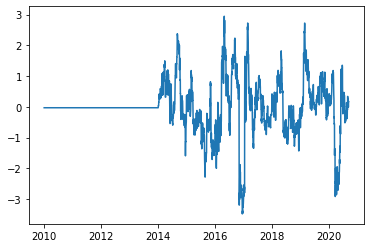

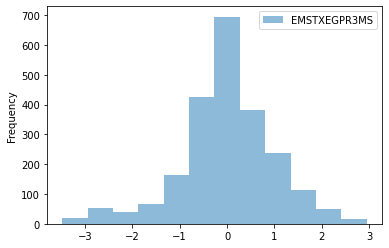

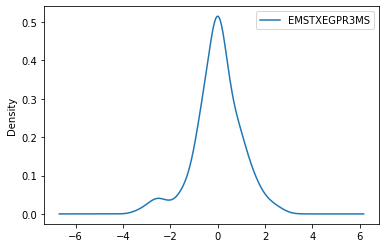

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FMEY1', start_date='2014-01-01', end_date=today))
EMSTXEGP = pd.concat([DBT, ticker_data['Settle']], axis=1)
EMSTXEGP.fillna(method='ffill', inplace=True)
EMSTXEGP.fillna(method='bfill', inplace=True)
EMSTXEGP.columns = ['EMSTXEGP']
EMSTXEGPR1 = EMSTXEGP.pct_change(1)
EMSTXEGPR1.columns = ['EMSTXEGPR1']
EMSTXEGPR1S = (EMSTXEGPR1 - EMSTXEGPR1.mean())/EMSTXEGPR1.std()
EMSTXEGPR1S.columns = ['EMSTXEGPR1S']
EMSTXEGPR1W = EMSTXEGP.pct_change(5)
EMSTXEGPR1W.columns = ['EMSTXEGPR1W']
EMSTXEGPR1WS = (EMSTXEGPR1W - EMSTXEGPR1W.mean())/EMSTXEGPR1W.std()
EMSTXEGPR1WS.columns = ['EMSTXEGPR1WS']
EMSTXEGPR3M = EMSTXEGP.pct_change(60)
EMSTXEGPR3M.columns = ['EMSTXEGPR3M']
EMSTXEGPR3MS = (EMSTXEGPR3M - EMSTXEGPR3M.mean())/EMSTXEGPR3M.std()
EMSTXEGPR3MS.fillna(method='bfill', inplace=True)
#print(EMSTXEGPR3MS.isna())
EMSTXEGPR3MS.columns = ['EMSTXEGPR3MS']
EMSTXEGPRY = EMSTXEGP.pct_change(260)
EMSTXEGPRY.columns = ['EMSTXEGPRY']
EMSTXEGPRYS = (EMSTXEGPRY - EMSTXEGPRY.mean())/EMSTXEGPRY.std()
EMSTXEGPRYS.columns = ['EMSTXEGPRYS']
EMSTXEGPTAB = EMSTXEGP.join(EMSTXEGPR1).join(EMSTXEGPR1W).join(EMSTXEGPR3M).join(EMSTXEGPRY)
print(EMSTXEGPTAB.describe())
EMSTXEGPTABS = EMSTXEGP.join(EMSTXEGPR1S).join(EMSTXEGPR1WS).join(EMSTXEGPR3MS).join(EMSTXEGPRYS)
print(EMSTXEGPTABS.tail())
EMSTXEGPTABSCOV = EMSTXEGPTABS.cov()
print(EMSTXEGPTABSCOV)
plt.plot(EMSTXEGPR3MS)
EMSTXEGPHIST = EMSTXEGPR3MS.plot.hist(bins=12, alpha=0.5)
EMSTXEGPNORM = EMSTXEGPR3MS.plot.kde(bw_method=0.3)



          EMSTXHUF   EMSTXHUFR1  EMSTXHUFR1W  EMSTXHUFR3M   EMSTXHUFRY
count  2265.000000  2264.000000  2260.000000  2205.000000  2005.000000
mean    350.426288     0.000253     0.001340     0.017677     0.084004
std     103.767638     0.013586     0.031883     0.111897     0.199861
min     166.300000    -0.110139    -0.242891    -0.454614    -0.366514
25%     256.500000    -0.004895    -0.015068    -0.034813    -0.097143
50%     334.500000     0.000000     0.000000     0.011511     0.084922
75%     456.800000     0.005593     0.018881     0.076136     0.259637
max     551.700000     0.076499     0.156444     0.379369     0.518340
            EMSTXHUF  EMSTXHUFR1S  EMSTXHUFR1WS  EMSTXHUFR3MS  EMSTXHUFRYS
2020-08-31     386.2    -0.397798     -0.872187     -0.583539    -1.512956
2020-09-01     382.1    -0.799995     -1.173487     -0.836611    -1.554475
2020-09-02     376.4    -1.116591     -1.120227     -0.762323    -1.595927
2020-09-03     379.8     0.646279     -0.720695     -0.536541

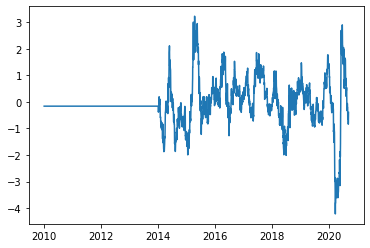

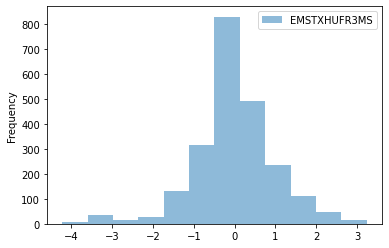

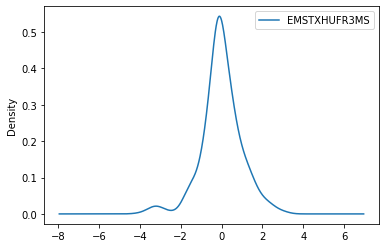

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FMHU1', start_date='2014-01-01', end_date=today))
EMSTXHUF = pd.concat([DBT, ticker_data['Settle']], axis=1)
EMSTXHUF.fillna(method='ffill', inplace=True)
EMSTXHUF.fillna(method='bfill', inplace=True)
EMSTXHUF.columns = ['EMSTXHUF']
EMSTXHUFR1 = EMSTXHUF.pct_change(1)
EMSTXHUFR1.columns = ['EMSTXHUFR1']
EMSTXHUFR1S = (EMSTXHUFR1 - EMSTXHUFR1.mean())/EMSTXHUFR1.std()
EMSTXHUFR1S.columns = ['EMSTXHUFR1S']
EMSTXHUFR1W = EMSTXHUF.pct_change(5)
EMSTXHUFR1W.columns = ['EMSTXHUFR1W']
EMSTXHUFR1WS = (EMSTXHUFR1W - EMSTXHUFR1W.mean())/EMSTXHUFR1W.std()
EMSTXHUFR1WS.columns = ['EMSTXHUFR1WS']
EMSTXHUFR3M = EMSTXHUF.pct_change(60)
EMSTXHUFR3M.columns = ['EMSTXHUFR3M']
EMSTXHUFR3MS = (EMSTXHUFR3M - EMSTXHUFR3M.mean())/EMSTXHUFR3M.std()
EMSTXHUFR3MS.fillna(method='bfill', inplace=True)
#print(EMSTXHUFR3MS.isna())
EMSTXHUFR3MS.columns = ['EMSTXHUFR3MS']
EMSTXHUFRY = EMSTXHUF.pct_change(260)
EMSTXHUFRY.columns = ['EMSTXHUFRY']
EMSTXHUFRYS = (EMSTXHUFRY - EMSTXHUFRY.mean())/EMSTXHUFRY.std()
EMSTXHUFRYS.columns = ['EMSTXHUFRYS']
EMSTXHUFTAB = EMSTXHUF.join(EMSTXHUFR1).join(EMSTXHUFR1W).join(EMSTXHUFR3M).join(EMSTXHUFRY)
print(EMSTXHUFTAB.describe())
EMSTXHUFTABS = EMSTXHUF.join(EMSTXHUFR1S).join(EMSTXHUFR1WS).join(EMSTXHUFR3MS).join(EMSTXHUFRYS)
print(EMSTXHUFTABS.tail())
EMSTXHUFTABSCOV = EMSTXHUFTABS.cov()
print(EMSTXHUFTABSCOV)
plt.plot(EMSTXHUFR3MS)
EMSTXHUFHIST = EMSTXHUFR3MS.plot.hist(bins=12, alpha=0.5)
EMSTXHUFNORM = EMSTXHUFR3MS.plot.kde(bw_method=0.3)



          EMSTXPLN   EMSTXPLNR1  EMSTXPLNR1W  EMSTXPLNR3M   EMSTXPLNRY
count  2265.000000  2264.000000  2260.000000  2205.000000  2005.000000
mean    213.397470    -0.000102    -0.000425    -0.005193    -0.028904
std      36.100028     0.012909     0.029626     0.103725     0.211989
min     120.600000    -0.109179    -0.246761    -0.431936    -0.418234
25%     187.400000    -0.005094    -0.015993    -0.061638    -0.174557
50%     217.400000     0.000000     0.000000    -0.000417    -0.067227
75%     245.900000     0.005107     0.016474     0.053665     0.027273
max     282.400000     0.067035     0.096899     0.377010     0.701441
            EMSTXPLN  EMSTXPLNR1S  EMSTXPLNR1WS  EMSTXPLNR3MS  EMSTXPLNRYS
2020-08-31     175.9    -1.461014     -0.062224      0.860241    -0.603122
2020-09-01     174.3    -0.696718     -0.798307      0.417553    -0.639304
2020-09-02     173.2    -0.480974     -0.784777      0.710233    -0.741483
2020-09-03     169.2    -1.781097     -1.887009      0.416771

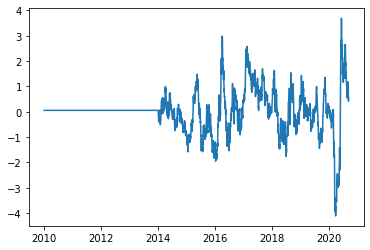

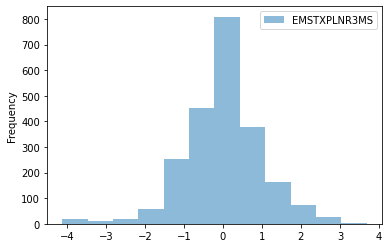

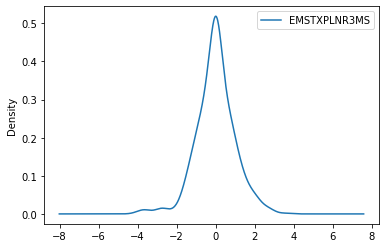

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FMPL1', start_date='2014-01-01', end_date=today))
EMSTXPLN = pd.concat([DBT, ticker_data['Settle']], axis=1)
EMSTXPLN.fillna(method='ffill', inplace=True)
EMSTXPLN.fillna(method='bfill', inplace=True)
EMSTXPLN.columns = ['EMSTXPLN']
EMSTXPLNR1 = EMSTXPLN.pct_change(1)
EMSTXPLNR1.columns = ['EMSTXPLNR1']
EMSTXPLNR1S = (EMSTXPLNR1 - EMSTXPLNR1.mean())/EMSTXPLNR1.std()
EMSTXPLNR1S.columns = ['EMSTXPLNR1S']
EMSTXPLNR1W = EMSTXPLN.pct_change(5)
EMSTXPLNR1W.columns = ['EMSTXPLNR1W']
EMSTXPLNR1WS = (EMSTXPLNR1W - EMSTXPLNR1W.mean())/EMSTXPLNR1W.std()
EMSTXPLNR1WS.columns = ['EMSTXPLNR1WS']
EMSTXPLNR3M = EMSTXPLN.pct_change(60)
EMSTXPLNR3M.columns = ['EMSTXPLNR3M']
EMSTXPLNR3MS = (EMSTXPLNR3M - EMSTXPLNR3M.mean())/EMSTXPLNR3M.std()
EMSTXPLNR3MS.fillna(method='bfill', inplace=True)
#print(EMSTXPLNR3MS.isna())
EMSTXPLNR3MS.columns = ['EMSTXPLNR3MS']
EMSTXPLNRY = EMSTXPLN.pct_change(260)
EMSTXPLNRY.columns = ['EMSTXPLNRY']
EMSTXPLNRYS = (EMSTXPLNRY - EMSTXPLNRY.mean())/EMSTXPLNRY.std()
EMSTXPLNRYS.columns = ['EMSTXPLNRYS']
EMSTXPLNTAB = EMSTXPLN.join(EMSTXPLNR1).join(EMSTXPLNR1W).join(EMSTXPLNR3M).join(EMSTXPLNRY)
print(EMSTXPLNTAB.describe())
EMSTXPLNTABS = EMSTXPLN.join(EMSTXPLNR1S).join(EMSTXPLNR1WS).join(EMSTXPLNR3MS).join(EMSTXPLNRYS)
print(EMSTXPLNTABS.tail())
EMSTXPLNTABSCOV = EMSTXPLNTABS.cov()
print(EMSTXPLNTABSCOV)
plt.plot(EMSTXPLNR3MS)
EMSTXPLNHIST = EMSTXPLNR3MS.plot.hist(bins=12, alpha=0.5)
EMSTXPLNNORM = EMSTXPLNR3MS.plot.kde(bw_method=0.3)



               DXY        DXYR1       DXYR1W       DXYR3M        DXYRY
count  2278.000000  2277.000000  2273.000000  2218.000000  2018.000000
mean     92.966771     0.000068     0.000336     0.004625     0.026665
std       6.599594     0.003747     0.008626     0.028759     0.068737
min      79.126000    -0.023855    -0.047970    -0.065744    -0.119029
25%      90.047000    -0.001393    -0.004475    -0.011269    -0.008929
50%      95.344500     0.000000     0.000000     0.000934     0.018359
75%      97.383500     0.001634     0.005102     0.019149     0.057261
max     103.605000     0.021887     0.054507     0.105296     0.256706
               DXY    DXYR1S   DXYR1WS   DXYR3MS    DXYRYS
2020-08-31  92.131 -0.734448 -1.145645 -1.901102 -1.184689
2020-09-01  92.337  0.578685 -0.860456 -1.698056 -1.149698
2020-09-02  92.834  1.418388 -0.234693 -1.698403 -1.034832
2020-09-03  92.733 -0.308359  0.405258 -1.822849 -1.033786
2020-09-04  92.719 -0.058306  0.387689 -1.833285 -1.035885
       

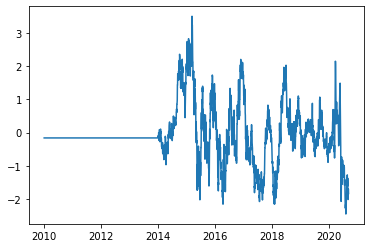

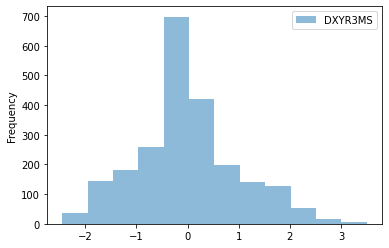

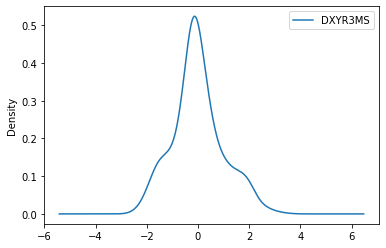

In [ ]:
ticker_data = (quandl.get('CHRIS/ICE_DX1', start_date='2014-01-01', end_date=today))
DXY = pd.concat([DBT, ticker_data['Settle']], axis=1)
DXY.fillna(method='ffill', inplace=True)
DXY.fillna(method='bfill', inplace=True)
DXY.columns = ['DXY']
DXYR1 = DXY.pct_change(1)
DXYR1.columns = ['DXYR1']
DXYR1S = (DXYR1 - DXYR1.mean())/DXYR1.std()
DXYR1S.columns = ['DXYR1S']
DXYR1W = DXY.pct_change(5)
DXYR1W.columns = ['DXYR1W']
DXYR1WS = (DXYR1W - DXYR1W.mean())/DXYR1W.std()
DXYR1WS.columns = ['DXYR1WS']
DXYR3M = DXY.pct_change(60)
DXYR3M.columns = ['DXYR3M']
DXYR3MS = (DXYR3M - DXYR3M.mean())/DXYR3M.std()
DXYR3MS.fillna(method='bfill', inplace=True)
#print(DXYR3MS.isna())
DXYR3MS.columns = ['DXYR3MS']
DXYRY = DXY.pct_change(260)
DXYRY.columns = ['DXYRY']
DXYRYS = (DXYRY - DXYRY.mean())/DXYRY.std()
DXYRYS.columns = ['DXYRYS']
DXYTAB = DXY.join(DXYR1).join(DXYR1W).join(DXYR3M).join(DXYRY)
print(DXYTAB.describe())
DXYTABS = DXY.join(DXYR1S).join(DXYR1WS).join(DXYR3MS).join(DXYRYS)
print(DXYTABS.tail())
DXYTABSCOV = DXYTABS.cov()
print(DXYTABSCOV)
plt.plot(DXYR3MS)
DXYHIST = DXYR3MS.plot.hist(bins=12, alpha=0.5)
DXYNORM = DXYR3MS.plot.kde(bw_method=0.3)



          EMSTXRUB   EMSTXRUBR1  EMSTXRUBR1W  EMSTXRUBR3M   EMSTXRUBRY
count  2266.000000  2265.000000  2261.000000  2206.000000  2006.000000
mean   1356.912180     0.000052     0.000271     0.003790     0.008135
std     252.253188     0.017289     0.037732     0.127792     0.204987
min     716.500000    -0.171150    -0.268421    -0.506157    -0.513831
25%    1164.000000    -0.006303    -0.018500    -0.067542    -0.172566
50%    1366.250000     0.000000     0.000000     0.003582     0.013753
75%    1540.250000     0.006525     0.019735     0.086571     0.158130
max    2005.000000     0.186396     0.297580     0.467013     0.757362
            EMSTXRUB  EMSTXRUBR1S  EMSTXRUBR1WS  EMSTXRUBR3MS  EMSTXRUBRYS
2020-08-31    1407.0    -0.003012     -0.212771     -0.131211    -0.995845
2020-09-01    1417.5     0.428630      0.011531     -0.244413    -0.966575
2020-09-02    1373.0    -1.818798     -0.693484     -0.367749    -1.081857
2020-09-03    1360.0    -0.550659     -0.892485     -0.399675

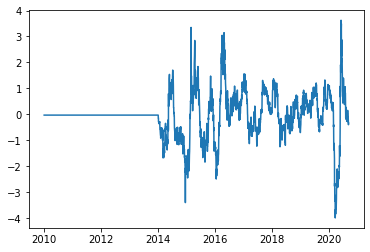

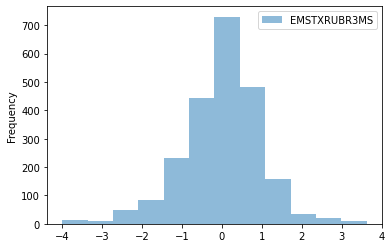

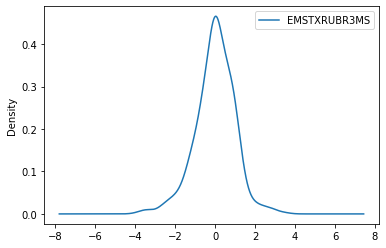

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FRDX1', start_date='2014-01-01', end_date=today))
# CHRIS/EUREX_FMRS1 Russia total return,  CHRIS/EUREX_FRDX1 RDXUSD
EMSTXRUB = pd.concat([DBT, ticker_data['Settle']], axis=1)
EMSTXRUB.fillna(method='ffill', inplace=True)
EMSTXRUB.fillna(method='bfill', inplace=True)
EMSTXRUB.columns = ['EMSTXRUB']
EMSTXRUBR1 = EMSTXRUB.pct_change(1)
EMSTXRUBR1.columns = ['EMSTXRUBR1']
EMSTXRUBR1S = (EMSTXRUBR1 - EMSTXRUBR1.mean())/EMSTXRUBR1.std()
EMSTXRUBR1S.columns = ['EMSTXRUBR1S']
EMSTXRUBR1W = EMSTXRUB.pct_change(5)
EMSTXRUBR1W.columns = ['EMSTXRUBR1W']
EMSTXRUBR1WS = (EMSTXRUBR1W - EMSTXRUBR1W.mean())/EMSTXRUBR1W.std()
EMSTXRUBR1WS.columns = ['EMSTXRUBR1WS']
EMSTXRUBR3M = EMSTXRUB.pct_change(60)
EMSTXRUBR3M.columns = ['EMSTXRUBR3M']
EMSTXRUBR3MS = (EMSTXRUBR3M - EMSTXRUBR3M.mean())/EMSTXRUBR3M.std()
EMSTXRUBR3MS.fillna(method='bfill', inplace=True)
#print(EMSTXRUBR3MS.isna())
EMSTXRUBR3MS.columns = ['EMSTXRUBR3MS']
EMSTXRUBRY = EMSTXRUB.pct_change(260)
EMSTXRUBRY.columns = ['EMSTXRUBRY']
EMSTXRUBRYS = (EMSTXRUBRY - EMSTXRUBRY.mean())/EMSTXRUBRY.std()
EMSTXRUBRYS.columns = ['EMSTXRUBRYS']
EMSTXRUBTAB = EMSTXRUB.join(EMSTXRUBR1).join(EMSTXRUBR1W).join(EMSTXRUBR3M).join(EMSTXRUBRY)
print(EMSTXRUBTAB.describe())
EMSTXRUBTABS = EMSTXRUB.join(EMSTXRUBR1S).join(EMSTXRUBR1WS).join(EMSTXRUBR3MS).join(EMSTXRUBRYS)
print(EMSTXRUBTABS.tail())
EMSTXRUBTABSCOV = EMSTXRUBTABS.cov()
print(EMSTXRUBTABSCOV)
plt.plot(EMSTXRUBR3MS)
EMSTXRUBHIST = EMSTXRUBR3MS.plot.hist(bins=12, alpha=0.5)
EMSTXRUBNORM = EMSTXRUBR3MS.plot.kde(bw_method=0.3)



          EMSTXZAR   EMSTXZARR1  EMSTXZARR1W  EMSTXZARR3M   EMSTXZARRY
count  2264.000000  2263.000000  2259.000000  2204.000000  2004.000000
mean    509.015485     0.000070     0.000356     0.002261    -0.004552
std      63.146399     0.017640     0.038488     0.112267     0.166205
min     271.500000    -0.115082    -0.214507    -0.481771    -0.466811
25%     480.175000    -0.006142    -0.020468    -0.053848    -0.121830
50%     505.300000     0.000000     0.000000     0.000154     0.024281
75%     547.125000     0.007043     0.020367     0.055579     0.116317
max     705.400000     0.108287     0.176788     0.485820     0.387156
            EMSTXZAR  EMSTXZARR1S  EMSTXZARR1WS  EMSTXZARR3MS  EMSTXZARRYS
2020-08-31     422.3    -2.604016     -0.709696      0.347564    -0.919768
2020-09-01     438.2     2.130460      0.002608      0.299931    -0.728897
2020-09-02     426.3    -1.543429     -0.552291      0.439066    -0.963994
2020-09-03     415.6    -1.426828     -1.594248      0.172542

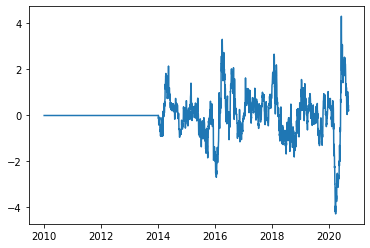

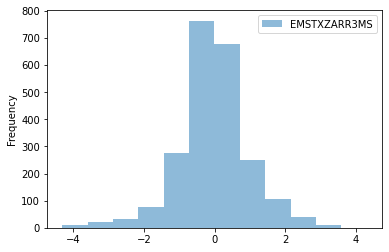

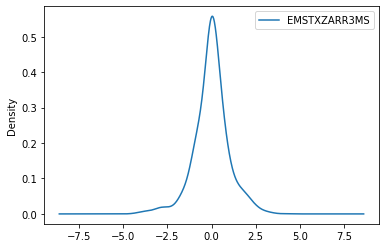

In [ ]:
ticker_data = (quandl.get('CHRIS/EUREX_FMZA1', start_date='2014-01-01', end_date=today))
EMSTXZAR = pd.concat([DBT, ticker_data['Settle']], axis=1)
EMSTXZAR.fillna(method='ffill', inplace=True)
EMSTXZAR.fillna(method='bfill', inplace=True)
EMSTXZAR.columns = ['EMSTXZAR']
EMSTXZARR1 = EMSTXZAR.pct_change(1)
EMSTXZARR1.columns = ['EMSTXZARR1']
EMSTXZARR1S = (EMSTXZARR1 - EMSTXZARR1.mean())/EMSTXZARR1.std()
EMSTXZARR1S.columns = ['EMSTXZARR1S']
EMSTXZARR1W = EMSTXZAR.pct_change(5)
EMSTXZARR1W.columns = ['EMSTXZARR1W']
EMSTXZARR1WS = (EMSTXZARR1W - EMSTXZARR1W.mean())/EMSTXZARR1W.std()
EMSTXZARR1WS.columns = ['EMSTXZARR1WS']
EMSTXZARR3M = EMSTXZAR.pct_change(60)
EMSTXZARR3M.columns = ['EMSTXZARR3M']
EMSTXZARR3MS = (EMSTXZARR3M - EMSTXZARR3M.mean())/EMSTXZARR3M.std()
EMSTXZARR3MS.fillna(method='bfill', inplace=True)
#print(EMSTXZARR3MS.isna())
EMSTXZARR3MS.columns = ['EMSTXZARR3MS']
EMSTXZARRY = EMSTXZAR.pct_change(260)
EMSTXZARRY.columns = ['EMSTXZARRY']
EMSTXZARRYS = (EMSTXZARRY - EMSTXZARRY.mean())/EMSTXZARRY.std()
EMSTXZARRYS.columns = ['EMSTXZARRYS']
EMSTXZARTAB = EMSTXZAR.join(EMSTXZARR1).join(EMSTXZARR1W).join(EMSTXZARR3M).join(EMSTXZARRY)
print(EMSTXZARTAB.describe())
EMSTXZARTABS = EMSTXZAR.join(EMSTXZARR1S).join(EMSTXZARR1WS).join(EMSTXZARR3MS).join(EMSTXZARRYS)
print(EMSTXZARTABS.tail())
EMSTXZARTABSCOV = EMSTXZARTABS.cov()
print(EMSTXZARTABSCOV)
plt.plot(EMSTXZARR3MS)
EMSTXZARHIST = EMSTXZARR3MS.plot.hist(bins=12, alpha=0.5)
EMSTXZARNORM = EMSTXZARR3MS.plot.kde(bw_method=0.3)



## **MAIN ASSETS 3M RETURNS STATS**

----------------------------------------------------------------------
1. Main assets 3m returns - descriptive stats
----------------------------------------------------------------------
            US1R3M       ES1R3M       CADR3M     EMSTXR3M       DXYR3M
count  3189.000000  2180.000000  2179.000000  2160.000000  2177.000000
mean      0.008979     0.018123     0.006803     0.010312     0.004570
std       0.044866     0.060054     0.034978     0.081822     0.028740
min      -0.116433    -0.320591    -0.108129    -0.344094    -0.065744
25%      -0.016101    -0.000828    -0.011743    -0.040932    -0.011347
50%       0.007993     0.020852     0.003028     0.006163     0.000826
75%       0.034273     0.049231     0.026485     0.066972     0.018981
max       0.194727     0.406134     0.127294     0.317394     0.105296
----------------------------------------------------------------------
2. Main assets 3m returns - covariance matrix
--------------------------------------------------------

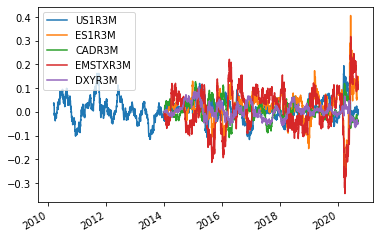

In [ ]:
MAIN3M = US1R3M.join(ES1R3M).join(CADR3M).join(EMSTXR3M).join(DXYR3M)
MAIN3M.truncate(before=cutoff)
MAIN3MCOV = MAIN3M.cov()
MAIN3MCOR = MAIN3M.corr()
print('-'*70) 
print("1. Main assets 3m returns - descriptive stats")
print('-'*70) 
print(MAIN3M.describe())
print('-'*70) 
print("2. Main assets 3m returns - covariance matrix")
print('-'*70)
print(MAIN3MCOV)
print('-'*70) 
print("3. Main assets 3m returns - correlation matrix")
print('-'*70)
print(MAIN3MCOR)
print('-'*70)
print("4. Main assets 3m returns - latest values")
print('-'*70)
print(MAIN3M.tail())
print('-'*70)
MAIN3M.plot(kind='line', legend=True)
plt.show()

----------------------------------------------------------------------
2020-08-31    -76.071934
2020-09-01     91.806615
2020-09-02     57.251002
2020-09-03   -145.955749
2020-09-04    -99.679331
dtype: float64
----------------------------------------------------------------------
count    2215.000000
mean        2.066610
std        53.092897
min      -675.756732
25%       -11.628584
50%         0.000000
75%        22.219153
max       545.109664
dtype: float64
----------------------------------------------------------------------
US1:  0.15  SPX:  0.35  CAD:  0.05  EM Stocks: 0.25  DXY:  0.2


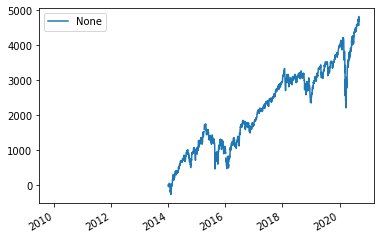

In [ ]:
w1=0.15
w2=0.35
w3=0.05
w4=0.25
w5=0.20
P1 = (w1*US1R1['US1R1']+w2*ES1R1['ES1R1']+w3*CADR1['CADR1']+w4*EMSTXR1['EMSTXR1']+w5*DXYR1['DXYR1'])*10000
print('-'*70)
print(P1.tail())
print('-'*70)
print(P1.describe())
print('-'*70)
print ('US1: ',w1,' SPX: ',w2,' CAD: ',w3,' EM Stocks:', w4,' DXY: ',w5)
plt.plot(P1)
P1TOTL = P1.cumsum()
plt.clf()
P1TOTL.plot(kind='line', legend=True)


In [ ]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

prices = pd.DataFrame(dtindex)
prices = US1.join(ES1).join(CAD).join(EMSTX).join(DXY)
print(prices.tail())

def get_risk(prices):
    return (prices.pct_change(1)).dropna().std()* np.sqrt(250)
def get_return(prices):
    return (prices.pct_change(1)).dropna().mean()*250
symbols = ['US1', 'ES1', 'CAD', 'EMSTX', 'DXY']
for symbol in symbols:
    print(symbol)
#symbols = ['CHRIS/CME_CL1', 'CHRIS/CME_ES1', 'CHRIS/CME_CNH1']


                  US1      ES1       CAD  EMSTX     DXY
2020-08-31  177.37500  3493.75  1.304717  526.9  92.131
2020-09-01  178.00000  3529.50  1.306506  536.5  92.337
2020-09-02  178.87500  3577.25  1.304461  534.9  92.834
2020-09-03  179.53125  3462.50  1.312767  526.3  92.733
2020-09-04  177.03125  3415.00  1.306336  520.4  92.719
US1
ES1
CAD
EMSTX
DXY


US1      0.113663
ES1      0.156353
CAD      0.067234
EMSTX    0.180684
DXY      0.059965
dtype: float64
US1      0.055029
ES1      0.082942
CAD      0.024979
EMSTX    0.045229
DXY      0.017344
dtype: float64


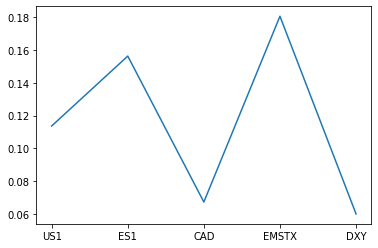

In [ ]:
prices = prices.dropna()
risk_v = get_risk(prices)
return_v = get_return(prices)

print(risk_v)
print(return_v)
plt.plot(risk_v)
#fig, ax = plt.subplots()
#ax.scatter(x=risk_v, y=return_v, alpha=0.5)

plt.show()

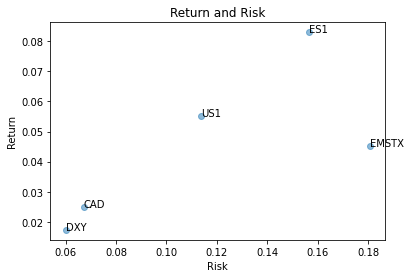

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=risk_v, y=return_v, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
plt.show()

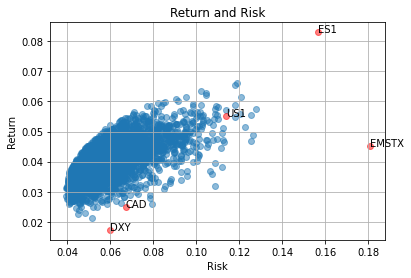

In [ ]:
def random_weights(n):
    weights = np.random.rand(n)
    return weights / sum(weights)
def get_portfolio_risk(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    return (portfolio / portfolio.shift(1) - 1).dropna().std().values[0]
def get_portfolio_return(weights, normalized_prices):
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=normalized_prices.index, data={'portfolio': portfolio_val})
    ret = get_return(portfolio)
    return ret[0]
risk_all = np.array([])
return_all = np.array([])
# for demo purpose, plot 3000 random portoflio
np.random.seed(0)
normalized_prices = prices / prices.iloc[0, :]
for _ in range(0, 3000):
    weights = random_weights(len(symbols))
    portfolio_val = (normalized_prices * weights).sum(axis=1)
    portfolio = pd.DataFrame(index=prices.index, data={'portfolio': portfolio_val})
    risk = get_risk(portfolio)
    ret = get_return(portfolio)
    risk_all = np.append(risk_all, risk)
    return_all = np.append(return_all, ret)
    p = get_portfolio_risk(weights=weights, normalized_prices=normalized_prices)
fig, ax = plt.subplots()
ax.scatter(x=risk_all, y=return_all, alpha=0.5)
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.scatter(x=risk_v, y=return_v, alpha=0.5, color='red')
ax.set(title='Return and Risk', xlabel='Risk', ylabel='Return')
ax.grid()
plt.show()

[0.21663876 0.12669701 0.34505277 0.24245445 0.069157  ]


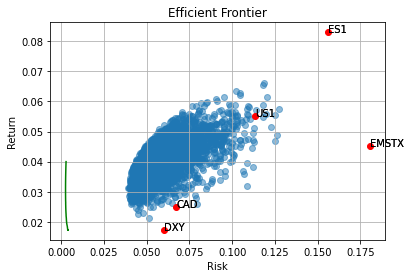

In [ ]:
# optimizer
def optimize(prices, symbols, target_return=0.1):
    normalized_prices = prices / prices.iloc[0, :]
    init_guess = np.ones(len(symbols)) * (1.0 / len(symbols))
    bounds = ((0.0, 1.0),) * len(symbols)
    weights = minimize(get_portfolio_risk, init_guess,
                       args=(normalized_prices,), method='SLSQP',
                       options={'disp': False},
                       constraints=({'type': 'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)},
                                    {'type': 'eq', 'args': (normalized_prices,),
                                     'fun': lambda inputs, normalized_prices:
                                     target_return - get_portfolio_return(weights=inputs,
                                                                          normalized_prices=normalized_prices)}),
                       bounds=bounds)
    return weights.x
print(weights)
optimal_risk_all = np.array([])
optimal_return_all = np.array([])
for target_return in np.arange(0.005, .0402, .0005):
    opt_w = optimize(prices=prices, symbols=symbols, target_return=target_return)
    optimal_risk_all = np.append(optimal_risk_all, get_portfolio_risk(opt_w, normalized_prices))
    optimal_return_all = np.append(optimal_return_all, get_portfolio_return(opt_w, normalized_prices))
# plotting
fig, ax = plt.subplots()
# random portfolio risk return
ax.scatter(x=risk_all, y=return_all, alpha=0.5)
# optimal portfolio risk return
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.plot(optimal_risk_all, optimal_return_all, '-', color='green')
# symbol risk return
for i, symbol in enumerate(symbols):
    ax.annotate(symbol, (risk_v[i], return_v[i]))
ax.scatter(x=risk_v, y=return_v, color='red')
ax.set(title='Efficient Frontier', xlabel='Risk', ylabel='Return')
ax.grid()
plt.savefig('return_risk_efficient_frontier.png', bbox_inches='tight')